In [1]:
import numpy as np
import pandas as pd


In [2]:
import warnings
from warnings import filterwarnings

In [3]:
from matplotlib import pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
df=pd.read_csv('IMDB.csv')

In [6]:
df.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [7]:
def func(text):
    if text=='positive':
        return 1;
    else:
        return 0
df['label']=df['sentiment'].apply(func)

In [8]:
df[['sentiment','label']].head(7)

,sentiment,label
0,positive,1
1,positive,1
2,positive,1
3,negative,0
4,positive,1
5,positive,1
6,positive,1


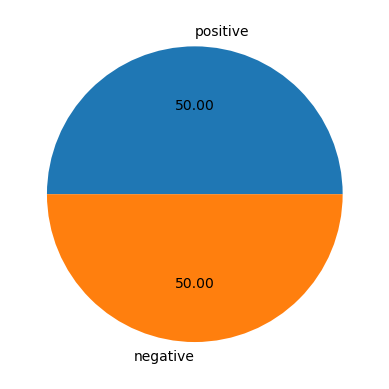

In [9]:
plt.pie(df['label'].value_counts(),autopct='%.2f',labels=['positive','negative'])
plt.show()

In [10]:
df.isnull().sum()

review       0
sentiment    0
label        0
dtype: int64

In [11]:
df.duplicated().sum()

418

In [12]:
df.drop_duplicates(keep='first', inplace=True)


In [13]:
df.duplicated().sum()

0

In [14]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [15]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [16]:
import pickle

In [17]:
with open('tokenizer.pkl', 'wb') as model_file:
    pickle.dump(tokenizer, model_file)

In [18]:
y_train=train_data['label']
y_test=test_data['label']

In [16]:
#LSTM

In [17]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

C:\Users\TANIYA\.android\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
model.build(input_shape=(None, 200))


In [19]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

In [20]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.regularizers import l2


In [21]:
from keras.optimizers import Adam


In [24]:
model1 = Sequential()
model1.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model1.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model1.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
optimizer = Adam(learning_rate=0.001)

model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) #

# Train the model
model1.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)



Epoch 1/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 1185s 2s/step - accuracy: 0.6998 - loss: 0.5711 - val_accuracy: 0.7357 - val_loss: 0.4917
Epoch 2/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 2535s 5s/step - accuracy: 0.8424 - loss: 0.3799 - val_accuracy: 0.8451 - val_loss: 0.3705
Epoch 3/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 1741s 4s/step - accuracy: 0.8797 - loss: 0.3096 - val_accuracy: 0.8664 - val_loss: 0.3273
Epoch 4/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 1328s 3s/step - accuracy: 0.8803 - loss: 0.3052 - val_accuracy: 0.8583 - val_loss: 0.3382
Epoch 5/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 1820s 4s/step - accuracy: 0.8829 - loss: 0.2928 - val_accuracy: 0.8622 - val_loss: 0.3552
Epoch 6/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 8258s 17s/step - accuracy: 0.8835 - loss: 0.3013 - val_accuracy: 0.8652 - val_loss: 0.3327
Epoch 7/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 1435s 3s/step - accuracy: 0.9090 - loss: 0.2425 - val_accuracy: 0.8782 - val_loss: 0.3108
Epoch 8/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 1304s 3s/step - accuracy: 0.9255 - loss: 0.2075 -

In [25]:
# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

310/310 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.8841 - loss: 0.3117
Test Accuracy: 0.8793990015983582


In [26]:
def predict_sentiment(review):
    seq=tokenizer.texts_to_sequences([review])
    padded_sequence=pad_sequences(seq,maxlen=200)
    prediction=model1.predict(padded_sequence)
    return prediction[0][0]

In [27]:
#text='I am satisfied with the product'     #0.22
#text='I am satisfied with the product'    
text='this product was satisfying'
sent=predict_sentiment(text)
print(sent)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
0.75394225


In [28]:
text='"The meeting is scheduled for 3 PM tomorrow."' # 0.07
sent=predict_sentiment(text)
print(sent)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
0.19446316


In [29]:
text='this movie was not that good'  # 0.17
sent=predict_sentiment(text)
print(sent)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
0.45136425


In [48]:
negative_threshold = 0.5
positive_threshold = 0.4

text="I am  unsatisfied with the product"
         # 0.17
score=predict_sentiment(text)  
if score < negative_threshold:
    sentiment = "Negative"
else:                                               #score > positive_threshold:
    sentiment = "Positive"

print(f'Text: "{text}" \t Sentiment score: {score} \t Classified as: {sentiment}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Text: "I am  unsatisfied with the product" 	 Sentiment score: 0.5013401508331299 	 Classified as: Positive


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load and preprocess data (assuming df has 'review' and 'label' columns)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['review']).toarray()
X_test = vectorizer.transform(test_data['review']).toarray()
y_train = train_data['label']
y_test = test_data['label']


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8366441464152465
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      4939
           1       0.84      0.84      0.84      4978

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917

[[4120  819]
 [ 801 4177]]


In [33]:
'''
from sklearn.model_selection import GridSearchCV

# Define the parameter grid

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
'''


"\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\n\nparam_grid = {\n    'n_estimators': [100, 200, 300, 400, 500],\n    'max_features': ['auto', 'sqrt', 'log2'],\n    'max_depth': [None, 10, 20, 30, 40, 50],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'bootstrap': [True, False]\n}\n\nparam_grid = {\n    'n_estimators': [100, 200],\n    'max_features': ['auto', 'sqrt'],\n    'max_depth': [10, 20],\n    'min_samples_split': [2, 5],\n    'min_samples_leaf': [1, 2],\n    'bootstrap': [True]\n}\n\n# Create the GridSearchCV object\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)\n\n# Perform the grid search\ngrid_search.fit(X_train, y_train)\n\n# Print the best parameters and best score\nprint(f'Best Parameters: {grid_search.best_params_}')\nprint(f'Best Score: {grid_search.best_score_}')\n\n# Evaluate the best model\nbest_rf = grid_search.best_estimator_\ny_pred = best_rf.predict

In [34]:
import pickle

In [35]:
with open('bidirectional_LSTM.pkl', 'wb') as model_file:
    pickle.dump(model1, model_file)


In [ ]:
df.shape

In [ ]:
df.head()

In [22]:
model2 = Sequential()
model2.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model2.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model2.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
optimizer = Adam(learning_rate=0.001)
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=5)

model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) #

# Train the model
model2.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[callback])

model2.save("model2_callbacks")

Epoch 1/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 1128s 2s/step - accuracy: 0.6285 - loss: 0.6404 - val_accuracy: 0.8210 - val_loss: 0.4221
Epoch 2/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 1070s 2s/step - accuracy: 0.8306 - loss: 0.4068 - val_accuracy: 0.8462 - val_loss: 0.3754
Epoch 3/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 1184s 2s/step - accuracy: 0.8118 - loss: 0.4297 - val_accuracy: 0.8342 - val_loss: 0.3914
Epoch 4/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 1224s 2s/step - accuracy: 0.8662 - loss: 0.3309 - val_accuracy: 0.8742 - val_loss: 0.3179
Epoch 5/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 1246s 3s/step - accuracy: 0.8977 - loss: 0.2662 - val_accuracy: 0.8813 - val_loss: 0.3136
Epoch 6/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 1310s 3s/step - accuracy: 0.9141 - loss: 0.2306 - val_accuracy: 0.8879 - val_loss: 0.2986
Epoch 7/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 1425s 3s/step - accuracy: 0.9241 - loss: 0.2065 - val_accuracy: 0.8776 - val_loss: 0.3093
Epoch 8/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 1148s 2s/step - accuracy: 0.9377 - loss: 0.1826 - 

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=model2_callbacks.

In [23]:
model2.save("model2_callbacks.keras")


In [24]:
model2.save("model2_callbacks.h5")


In [1]:
pip show tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\TANIYA\AppData\Roaming\Python\Python311\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow.keras

In [3]:
from keras.utils import pad_sequences


In [4]:
pip show keras


Note: you may need to restart the kernel to use updated packages.Name: keras
Version: 3.4.1
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: C:\Users\TANIYA\AppData\Roaming\Python\Python311\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow-intel

